# 9.1、matplotlib API 入门

In [6]:
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

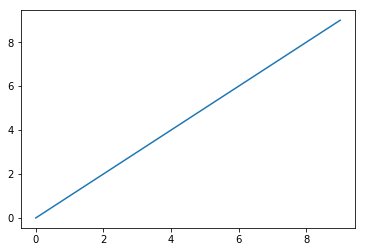

In [7]:
plt.plot(data)

## Figure 和Subplot

* matplotlib 的图像都位于Figure图像当中，可以使用plt.figure创建一个新的Figure
* plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。
* 不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行：

In [8]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [22]:
ax1 = fig.add_subplot(221)


d:\program filles\python\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


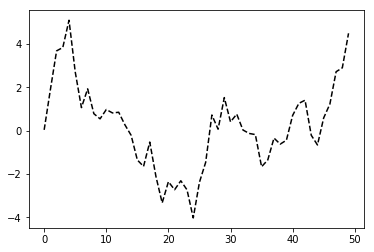

In [23]:
plt.plot(np.random.randn(50).cumsum(),'k--')

* fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了

d:\program filles\python\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(array([ 2.,  3.,  5.,  4., 13., 22.,  9., 10., 12.,  7.,  4.,  3.,  1.,
         3.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.08685413, -1.76136275, -1.43587137, -1.11038   , -0.78488862,
        -0.45939725, -0.13390587,  0.19158551,  0.51707688,  0.84256826,
         1.16805963,  1.49355101,  1.81904238,  2.14453376,  2.47002514,
         2.79551651,  3.12100789,  3.44649926,  3.77199064,  4.09748202,
         4.42297339]),
 <a list of 20 Patch objects>)

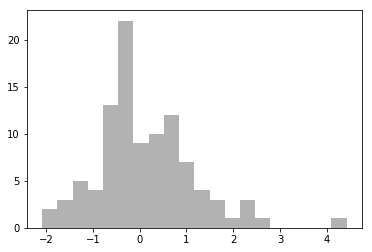

In [25]:
ax2 = fig.add_subplot(222)
plt.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

d:\program filles\python\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


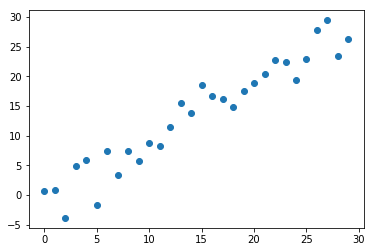

In [26]:
ax3 = fig.add_subplot(2,2,3)
plt.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

* matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

In [1]:
import matplotlib.pyplot as plt
import numpy as np

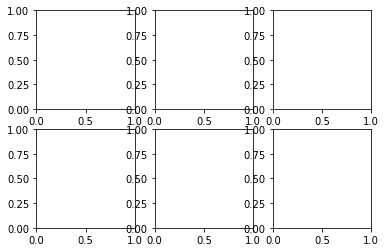

In [4]:
fig, axs = plt.subplots(2,3)

In [5]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x082B6D10>,
      dtype=object)

* ![参数说明](https://upload-images.jianshu.io/upload_images/7178691-88bb55faca7d01ba.png)

## 调整subplot周围的边距
* 利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数.
* wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。

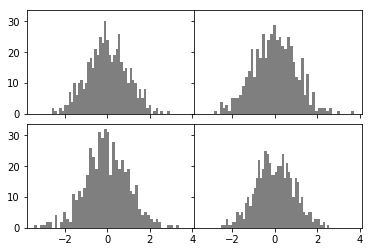

In [15]:
fig,axs = plt.subplots(2,2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axs[i,j].hist(np.random.randn(500),bins = 50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0.1)

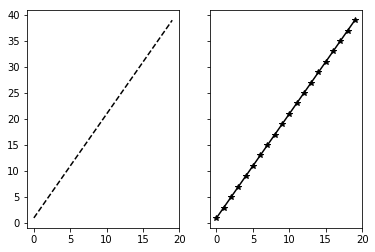

In [28]:
fig,axs = plt.subplots(1,2, sharex=True,sharey=True)
axs[0].plot(np.arange(20),np.arange(20)*2+1,linestyle='--',color='k')
axs[1].plot(np.arange(20),np.arange(20)*2+1,linestyle='-',color='k',marker='*')

* 在线型图中，非数据点默认的是按线形插值的方式。可以通过drawstyle参数进行修改

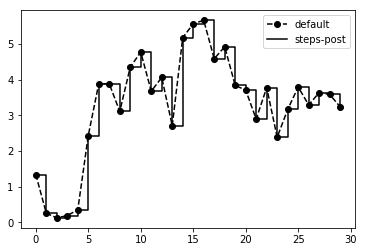

In [35]:
data = np.random.randn(30).cumsum()
plt.plot(data,'ko--',label="default")
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

## 刻度、标签和图例
* xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

    * 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
    * 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

Text(0.5,0,'Stages')

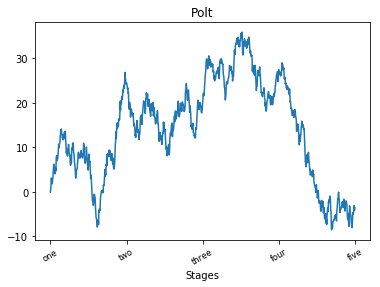

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30, fontsize='small')
ax.set_title("Polt")
ax.set_xlabel('Stages')

*　要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

* 轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：

[Text(0.5,0,'Stage'), Text(0.5,1,'Plot')]

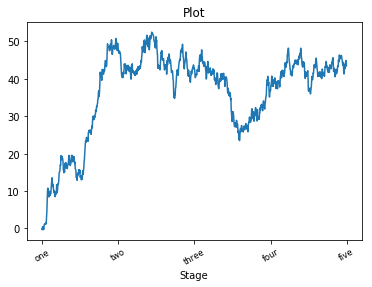

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30, fontsize='small')
probs = {
    'title':"Plot",
    'xlabel':'Stage'
}
ax.set(**probs)

## 添加图例
* 添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

In [2]:
from numpy.random import randn

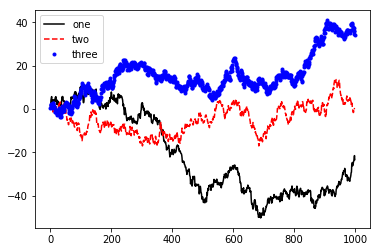

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'r--',label='two')
ax.plot(randn(1000).cumsum(),'b.',label='three')
ax.legend(loc = 'best')

## 注解以及在Subplot上绘图
* 注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：
    * **ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)**
* 注解中可以既含有文本也含有箭头。例如，我们根据最近的标准普尔500指数价格（来自Yahoo!Finance）绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期。

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

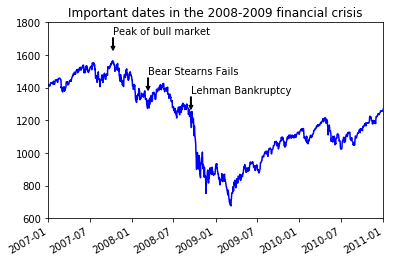

In [40]:
from datetime import datetime
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('data/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='b-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=1,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

* 图形的绘制要麻烦一些。matplotlib有一些表示常见图形的对象。这些对象被称为块（patch）。其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches。
要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中

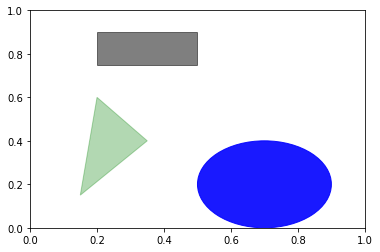

In [62]:
fig  = plt.figure()
ax = fig.add_subplot(111)
rect = plt.Rectangle((0.2,0.75),0.3,0.15,color='k',alpha=0.5)
circ = plt.Circle((0.7,0.2),0.2,color='b',alpha=0.9)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

* 参数说明：
    * 矩形参数：1、左下角定点坐标；2、长；3、宽；4、颜色；5、颜色深度
    * 圆形参数：1、圆心；2、半径；3、颜色；4、颜色深浅。注：因为刻度问题，看着像是椭圆
    * 三角形：1、三个顶点的坐标；2、颜色；3、颜色深度

## 将图表保存到文件
* 利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。
* 在保存图片时最常用到两个参数是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：

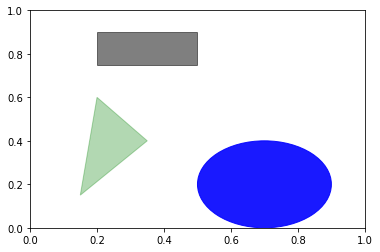

In [72]:
fig  = plt.figure()
ax = fig.add_subplot(111)
rect = plt.Rectangle((0.2,0.75),0.3,0.15,color='k',alpha=0.5)
circ = plt.Circle((0.7,0.2),0.2,color='b',alpha=0.9)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('data/figpath.svg')#矢量图
plt.savefig('data/figpath.png',dpi=800, bbox_inches='tight')

* savefig()的参数：
![](https://upload-images.jianshu.io/upload_images/7178691-4bee796bf7262423.png)